In [305]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [307]:
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [309]:
df.drop(columns=["Unnamed: 0", "year", "month"], axis = 1, inplace = True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [311]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


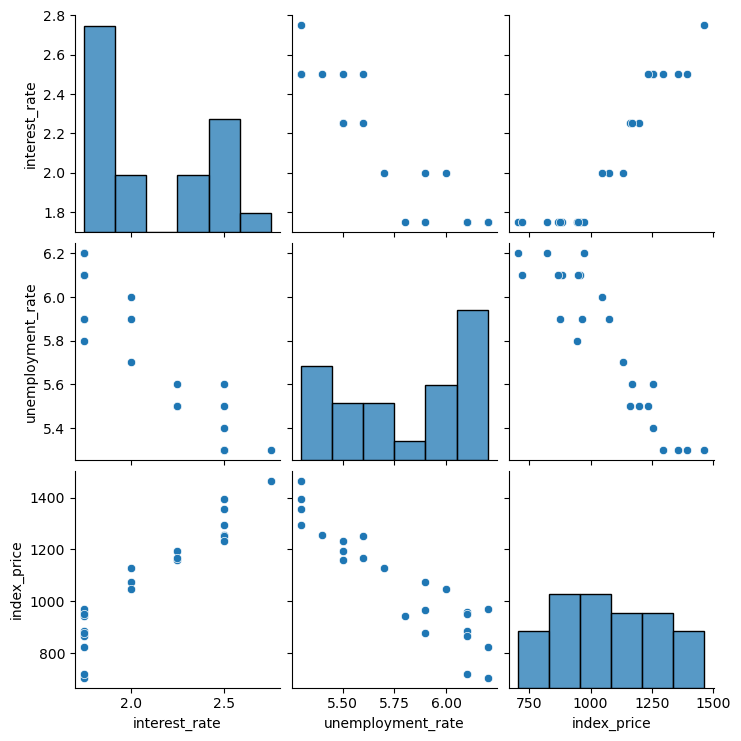

In [313]:
sns.pairplot(df)

In [315]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

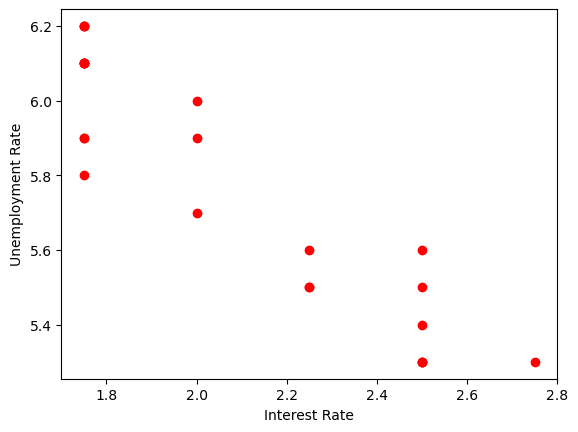

In [317]:
plt.scatter(df["interest_rate"], df["unemployment_rate"], color = 'r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

Text(0, 0.5, 'Unemployment Rate')

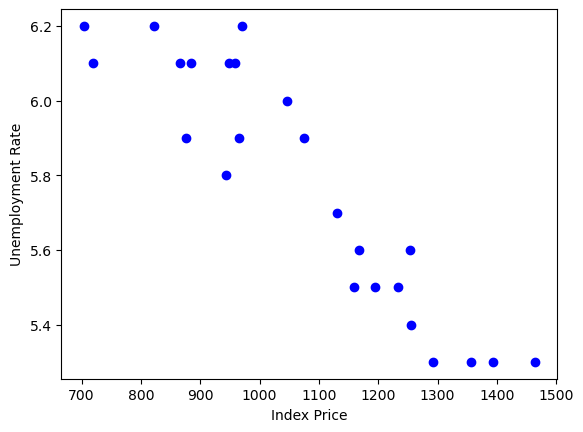

In [319]:
plt.scatter(df["index_price"], df["unemployment_rate"], color = 'b')
plt.xlabel("Index Price")
plt.ylabel("Unemployment Rate")

In [321]:
X = df.iloc[:, :-1]
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [323]:
y = df.iloc[:, -1]
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [325]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

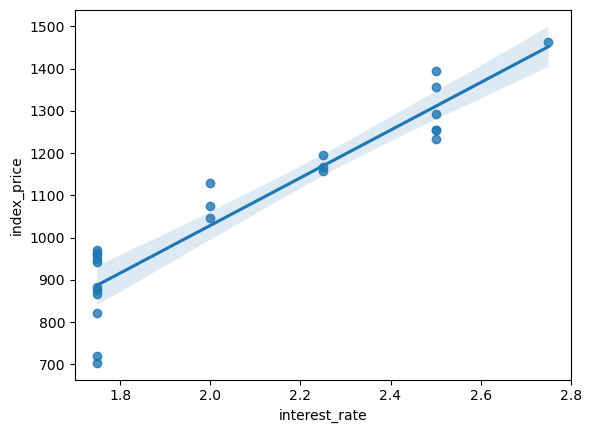

In [218]:
sns.regplot(x = df["interest_rate"], y = df["index_price"])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

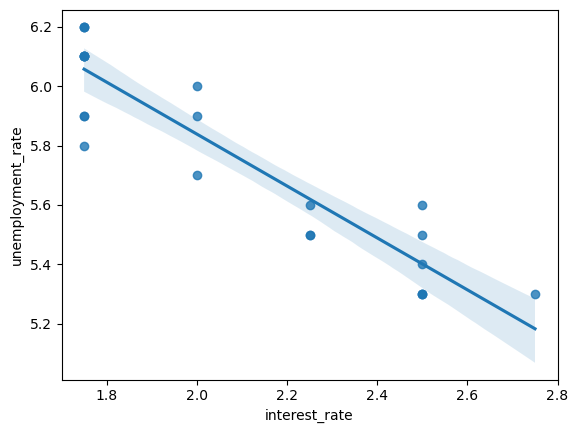

In [219]:
sns.regplot(x = df["interest_rate"], y = df["unemployment_rate"])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

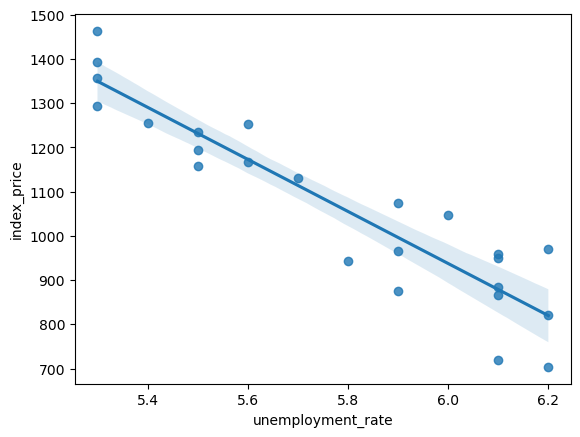

In [220]:
sns.regplot(x = df["unemployment_rate"], y = df["index_price"])

In [224]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [225]:
X_train

array([[ 0.55339859, -0.53244666],
       [-0.9486833 ,  0.41597395],
       [ 1.30443953, -1.48086727],
       [-0.9486833 ,  1.36439457],
       [ 1.30443953, -0.53244666],
       [ 1.30443953, -1.48086727],
       [-0.19764235,  0.73211416],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -1.48086727],
       [ 1.30443953, -1.16472707],
       [-0.9486833 ,  1.36439457],
       [-0.9486833 ,  1.04825436],
       [-0.9486833 ,  0.41597395],
       [-0.9486833 ,  1.04825436],
       [ 0.55339859, -0.84858687],
       [-0.19764235, -0.21630646],
       [-0.9486833 ,  0.09983375],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -0.84858687]])

In [226]:
X_test

array([[ 0.40089186, -0.8660254 ],
       [-0.93541435,  1.15470054],
       [ 1.73719807, -1.44337567],
       [-0.93541435,  0.8660254 ],
       [-0.26726124,  0.28867513]])

In [227]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [228]:
regression.fit(X_train, y_train)

LinearRegression()

In [396]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring = "neg_mean_squared_error", cv = 2)

In [397]:
np.mean(validation_score)

-7770.957863552216

In [399]:
y_pred = regression.predict(X_test)
y_pred

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([627.07930897, 503.92855156, 693.20578014, 515.33340881,
       559.80150164])

In [401]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [403]:
mae = mean_absolute_error(y_test, y_pred)
mae

530.7302897730378

In [406]:
mse = mean_squared_error(y_test, y_pred)
mse

299312.7274040231

In [408]:
rmse = np.sqrt(mse)
rmse

547.0948065957335

In [410]:
from sklearn.metrics import r2_score

In [412]:
score = r2_score(y_test, y_pred)
score

-6.507698698587697

In [414]:
ar2_score = (1 - (1 - score)*(len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)) * 100
ar2_score

-1401.5397397175393

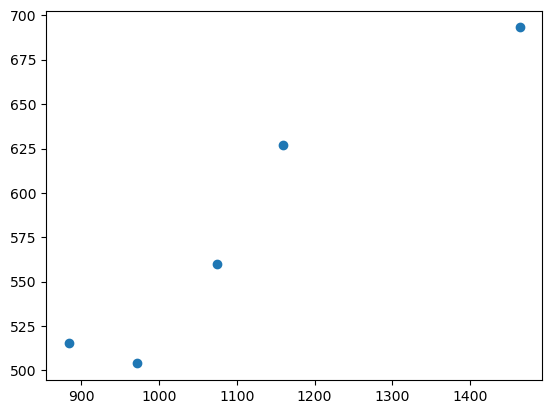

In [416]:
plt.scatter(y_test, y_pred)

In [418]:
residuals = y_test - y_pred
residuals

8     531.920691
16    467.071448
0     770.794220
18    368.666591
11    515.198498
Name: index_price, dtype: float64

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


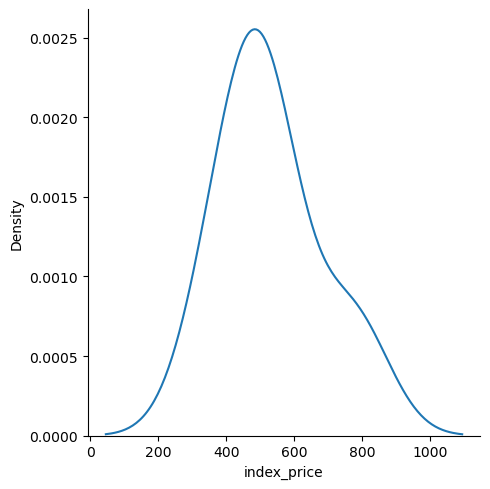

In [420]:
sns.displot(residuals, kind = "kde")

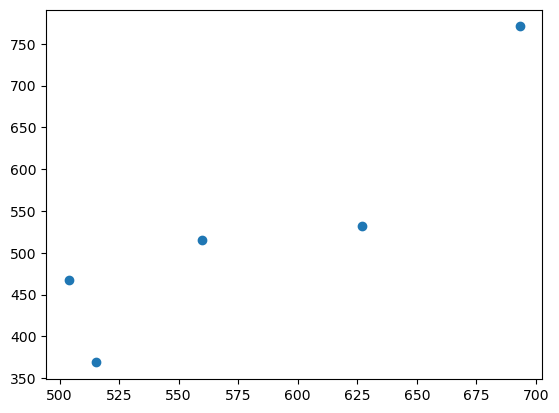

In [422]:
plt.scatter(y_pred, residuals)

In [424]:
import statsmodels.api as sm

model = sm.OLS(y_train,X_train).fit()

In [426]:
model.summary()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1662.
Date:                Sun, 24 Dec 2023   Prob (F-statistic):                    3.20e-20
Time:                        14:38:32   Log-Likelihood:                         -109.49
No. Observations:                  19   AIC:                                      223.0
Df Residuals:                      17   BIC:                                      224.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
interest_rate       569.9366     42.582     13.384      0.000     480.096     659.777
unemployment_rate   -20.5704     15.423     -1.334      0.200     -53.110      11.969
==============================================================================
Omnibus:                        1.784   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.377
Skew:                          -0.626   Prob(JB):                        0.502
Kurtosis:                       2.586   Cond. No.                         14.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [428]:
regression.coef_

array([  86.63351334, -114.04857249])